In [175]:
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt 
import scipy.optimize
from scipy.stats import poisson, chi2, kstwobign
from scipy.stats import moment

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [176]:
n = 100
columns = [i for i in range(0, 10)]
index = ["Погрешность"]
data_df = pd.DataFrame(columns=columns, index = pd.Index(index))
data_df.loc["Погрешность"] = np.array([5, 8, 6, 12, 14, 18, 11, 6, 13, 7])
data_df

,0,1,2,3,4,5,6,7,8,9
Погрешность,5,8,6,12,14,18,11,6,13,7


In [177]:
p = 1/10 # Для равномерного распределения для дискретных значений
delta = 0
for i in range(0, 10): delta += (n*p - data_df.loc["Погрешность", i])**2 / (n*p)
delta

16.4

In [178]:
sf = chi2.sf(delta, 9)
print(f"p_value = {sf}")

p_value = 0.058984030544419586


p-value > 0.05 => Нет оснований отвергнуть H0

***Колмогоров***

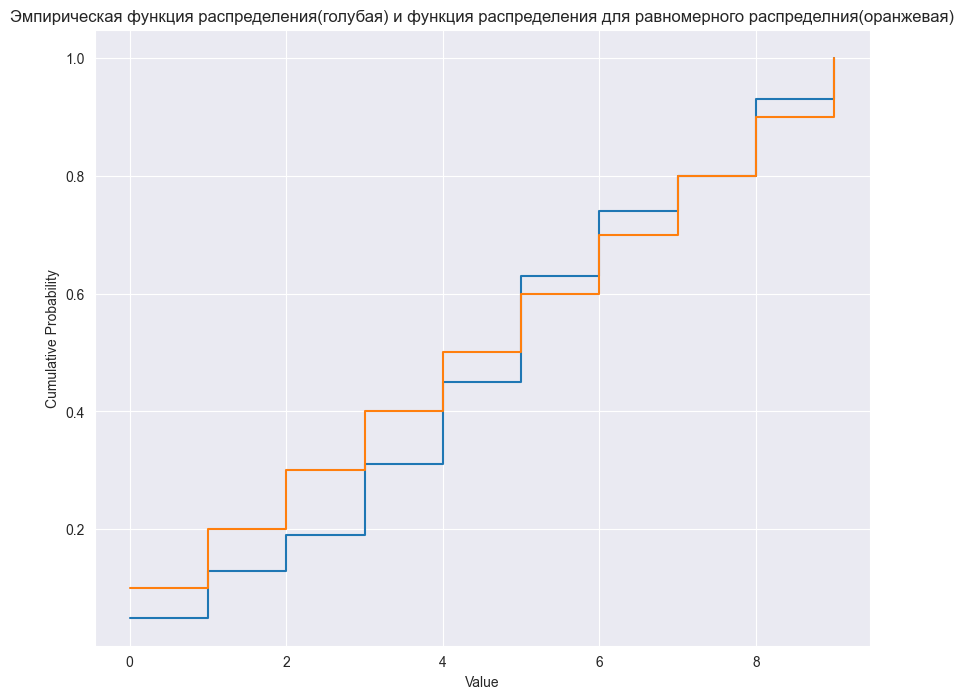

In [179]:
p_even = [i/10 for i in range(1, 11)]
p_empirical = [data_df.loc["Погрешность", 0]/n]
for i in range(1, 10):
    p_empirical.append(p_empirical[i-1] + data_df.loc["Погрешность", i]/n)

# Plotting
plt.step(columns, p_empirical, where='post')
plt.step(columns, p_even, where="post")
plt.title('Эмпирическая функция распределения(голубая) и функция распределения для равномерного распределния(оранжевая)')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

In [180]:
print(f"tp_even = \t{p_even}")
print(f"p_empirical = \t{p_empirical}")

tp_even = 	[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
p_empirical = 	[0.05, 0.13, 0.19, 0.31, 0.45, 0.63, 0.74, 0.8, 0.93, 1.0]


In [181]:
delta = 0
delta = max(abs(p_even[0] - 0), abs(p_even[0] - p_empirical[0]))
for i in range(1, 10):
    delta = max(delta, abs(p_even[i] - p_empirical[i-1]), abs(p_even[i] - p_empirical[i]))
delta *= math.sqrt(n)
delta

2.1

In [182]:
kolmogorov_dist = kstwobign
sf_value = kolmogorov_dist.sf(delta)
print(f"P(delta >= {delta}) = {sf_value}")

P(delta >= 2.1) = 0.0002954967204631142


p-value <= 0.05 => Отвергаем H0 (результаты значимы)

**Пункт б**

$$ОМПГ$$

**Гипотезы:**
- $H_0 : \xi \sim N(\theta_1, \theta_2)$
- $H_1 : H_0$

**Про оценки:**
*He смещенные, состоятельные для нормального распределения (на семинаре находили):*

**Оценки параметров:**
- $\tilde{λ}_1 = \overline{x}_n \approx 4,77$
- $\tilde{\mu}_2 = S^2 = \frac{1}{n-1} \cdot \sum_{i=1}^n (x_i - \overline{x}_n)^2 \approx 6,39$

In [183]:
data = np.array([5, 8, 6, 12, 14, 18, 11, 6, 13, 7])
segments = np.array([(-np.inf, 1)] + [(i, i + 1) for i in range(1, 9)] + [(9, np.inf)])
sample = np.repeat(np.arange(len(data)), data)

# Для удобства напишем функцию нормального распределения, мат ожидание и корня дисперсию
def F_normal(x, mean, sigma):
    return 0.5 * (1 + math.erf((x - mean)/(np.sqrt(2) * sigma)))

def F_normal_wave(x): return F_normal(x, alpha, sigma)

# Оценка мат ожидания
alpha = np.mean(sample)
# Оценка корня дисперсии (несмещенная)
sigma = np.sqrt(np.var(sample) * n/(n-1))


In [184]:
from tabulate import tabulate

# Вероятность каждого события
p = [F_normal_wave(i[1]) - F_normal_wave(i[0]) for i in segments]

# Создаем таблицу
table_data = []
for i in range(len(p)):
    table_data.append([f"Сегмент {i+1}", segments[i][0], segments[i][1], f"{p[i] * n:.2f}"])

# Выводим таблицу
headers = ["Интервал", "Нижняя граница интервала", "Верхняя граница", "Вероятность p_i"]
print(tabulate(table_data, headers=headers, tablefmt="grid", floatfmt=".2f"))

delta = sum((n * p[i] - data[i]) ** 2 / (n * p[i]) for i in range(10))
print(f"\ndelta = {delta}")

+------------+----------------------------+-------------------+-------------------+
| Интервал   |   Нижняя граница интервала |   Верхняя граница |   Вероятность p_i |
+============+============================+===================+===================+
| Сегмент 1  |                    -inf    |              1.00 |              6.72 |
+------------+----------------------------+-------------------+-------------------+
| Сегмент 2  |                       1.00 |              2.00 |              6.85 |
+------------+----------------------------+-------------------+-------------------+
| Сегмент 3  |                       2.00 |              3.00 |             10.54 |
+------------+----------------------------+-------------------+-------------------+
| Сегмент 4  |                       3.00 |              4.00 |             13.88 |
+------------+----------------------------+-------------------+-------------------+
| Сегмент 5  |                       4.00 |              5.00 |             

In [185]:
# Подсчет p-value
k = 10
m = 2
sf = chi2.sf(delta, k - 1 - m)
print(f"P(delta >= {delta}) = {sf} ")

P(delta >= 16.87106704806876) = 0.018246753020384292 


**p-value < 0.05 => H0 отвергается**

**По критерию Колмогорова, использую параметрический бутстрап**

In [186]:
F_emperical = np.array([sum(data[:i]) for i in range(len(data) + 1)]) / n
repeat = 50000
bootstrap_delta = []
x = np.arange(10)
delta_wave = np.sqrt(n) * np.max(
    [max(np.abs(F_normal_wave(x[i]) - F_emperical[i]), np.abs(F_normal_wave(x[i]) - F_emperical[i + 1])) for i in
     range(10)])


# Функция нормального распределения по подвыборке
def F_bootstrap_wave(j):
    return F_normal(random_sample[j], alpha_bootstrap, sigma_bootstrap)


for _ in range(repeat):
    random_sample = np.array(sorted(np.random.normal(alpha, sigma, n)))

    # считаем мат ожидание и корень из дисперсии по подвыборке
    alpha_bootstrap = random_sample.mean()
    sigma_bootstrap = np.sqrt(random_sample.var() * n / (n - 1))

    F_bootstrap_emperical = [i / n for i in range(n + 1)]

    sup = np.sqrt(n) * np.max(
        [max(np.abs(F_bootstrap_wave(j) - F_bootstrap_emperical[j]),
             np.abs(F_bootstrap_wave(j) - F_bootstrap_emperical[j + 1])) for
         j in range(len(random_sample))])

    bootstrap_delta.append(sup)

bootstrap_delta = np.array(bootstrap_delta)

p_value = len(bootstrap_delta[bootstrap_delta >= delta_wave]) / repeat

print(f"p-value = {p_value} ")

p-value = 0.01434 


**p-value < 0.05 => H0 отвергаем**